# Process-based simulation - Flumy

Another very interesting possibility to obtain training images for multiple-point statistics simulation is *process-based* simulation. This technique relies on methods that mimic the physical process that originated the sediments to be simulated. The conditioning of the process-based simulation is very tricky, but as we explained for the object based simulations, one can use non-conditional simulaitions as training images for multiple-point statistics, that handles much better the conditioning.

> **Note** The following notebook is almost a copy and paste from the example script provided with the `flumy` Python module at the address [https://pypi.org/project/flumy/](https://pypi.org/project/flumy/). For more information about FLUMY and for an interesting animation, please see [https://flumy.minesparis.psl.eu/](https://flumy.minesparis.psl.eu/), un particular the "main features" section.





In [ ]:
import pyevtk.hl as ph # Required to save the final results as a VTI

Flumy (7.201) / 2023/09/28 - 17:17
     Info      : Launching Flumy with: MaxDepth = 3, SandBodyIndex = 80, NetToGross = 50
     Info      : Flumy Non Expert User (standard):
               :  NEXUS input:
               :   hmax=3m
               :   isbx=80
               :   sand=50%
               :   adapt_grid=0
               :  NEXUS output:
               :   width=30m
               :   e=4e-08m/s
               :   slope=0.001
               :   wavelength=375m
               :   trav=500it
               :   tlvb=280it
               :   tob=70it
               :   iob=0.1m
               :   lambda=919m
               :  Intermediate values:
               :   hmean=2m
               :   cf=0.0158(unit?)
               :   velocity=0.854666m/s
               :   lambda (raw)=900m
               :   ios=0.03m
               :   tav=365.893it
               :  Forecasts:
               :   rel_flw_dir=0deg
               :   adx=2720m
               :   forecast_sand=50%
   

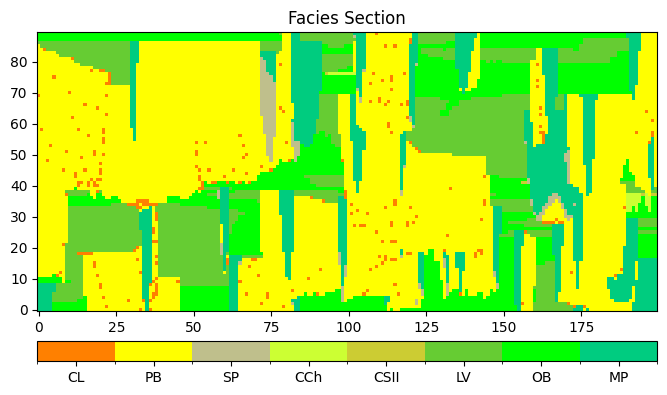

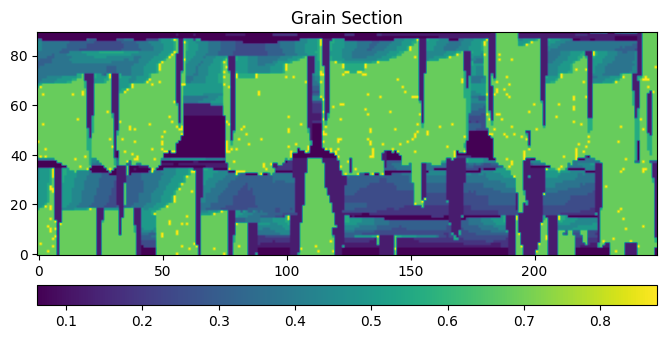

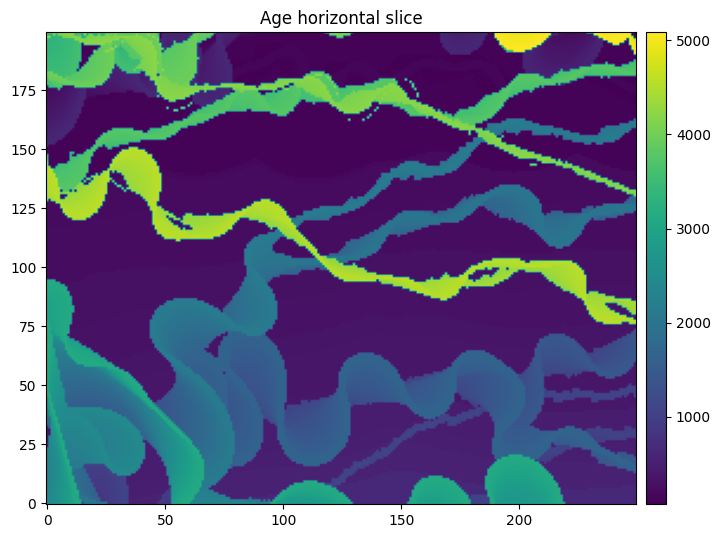

In [1]:
# Import package
from flumy import *

nx      = 250   # Number of grid nodes along Ox
ny      = 200   # Number of grid nodes along Oy
mesh    = 10    # Horizontal grid mesh size: 10m
hmax    = 3     # Maximum channel depth: 3m
ng      = 50    # Required Net-to-Gross: 50%
isbx    = 80    # Required sand bodies extension (medium extension = few meander cutoffs)
verbose = True  # Verbose mode

res = 30            # Vertical resolution (increase 'res' to get higher resolution)
dz  = hmax / res    # Vertical discretization step (0.1m)
zul = 3 * hmax      # Fill a reservoir of 3 x hmax height (9m)
nz  = int(zul / dz) # Number of vertical nodes of the resulted block of sediments

# Launch the simulation
seed = 123456 # Simulation seed
# Create the simulator
flsim = Flumy(nx, ny, mesh, verbose)
# Launch up to zul
success = flsim.launch(seed, hmax, isbx, ng, zul)
if (not success):
    print("Error while running Flumy")

# Display the age of the simulation, the mean topography reached and the total number of meander cutoffs
print("Final age:",flsim.getAge(), "yr")
print("Mean topography:",round(flsim.getDomain().getMeanTopo(),2), "m")
print("Number of cutoffs:",flsim.getNbCutoff())

# Retrieve the simulated block informed with facies, grain size and age (in three numpy arrays)
fac,grain,age = flsim.getBlock(dz, zb=0 ,nz=nz)
print("type(fac):", type(fac))
print("fac.shape:", fac.shape)
# Display facies proportions
print("Facies proportions (%):", getProps(fac))
# Sand proportion (PB) corresponds more or less to the required Net-to-Gross

In [14]:
flsim.getBlock(0.2)[1].shape

(250, 200, 51)

In [15]:
flsim.getBlock?

Signature: flsim.getBlock(dz, zb=None, zt=None, nz=None)
Docstring:
Retrieve the 3D block of a Flumy simulation.
The sediment volume is vertically discretized using given arguments.
This method returns three 3D numpy arrays:
- fac: Flumy facies identifiers
- grain: Grain size (0: fine sediment, 1: coarse sediment)
- age: Age of the deposit (iteration number = year)
Values are ordered +Z +Y +X (z-index increases faster, x-index increases slower)

dz: Vertical step
zb: Bottom elevation of the block (if None, use Zref)
zt: Top elevation of the block (if None, use Max Topo)
nz: Number of vertical discretization steps (if None, discretize up to Max Topo)
File:      ~/.virtualenvs/gmg/lib/python3.10/site-packages/flumy/__init__.py
Type:      method

## Save a 3D VTI file

The results can be saved into a VTI file as we did for the 3D multiple-point statistics simulations, for the visualization with Paraview.

In [17]:
# Empy dictionary to contain the results
cellData = {}
# The facies codes
cellData["facies"] = flsim.getBlock(0.2)[0]
# The grain size
cellData["grain"] = flsim.getBlock(0.2)[1]
# The age of the sediments
cellData["age"] = flsim.getBlock(0.2)[2]

# Save the results into a VTI file
ph.imageToVTK("./flumy", cellData=cellData) # No need to define explicitly the file extension VTI

'/home/alex/workspace/dev/binder/gmg/notebooks/simulation/flumy.vti'

## Concluding remarks

Of course, different processes should be implemented to cover all the possible types of sediment heterogeneities available on Earth... FLUMY provided fluvial and turbiditic environments.
